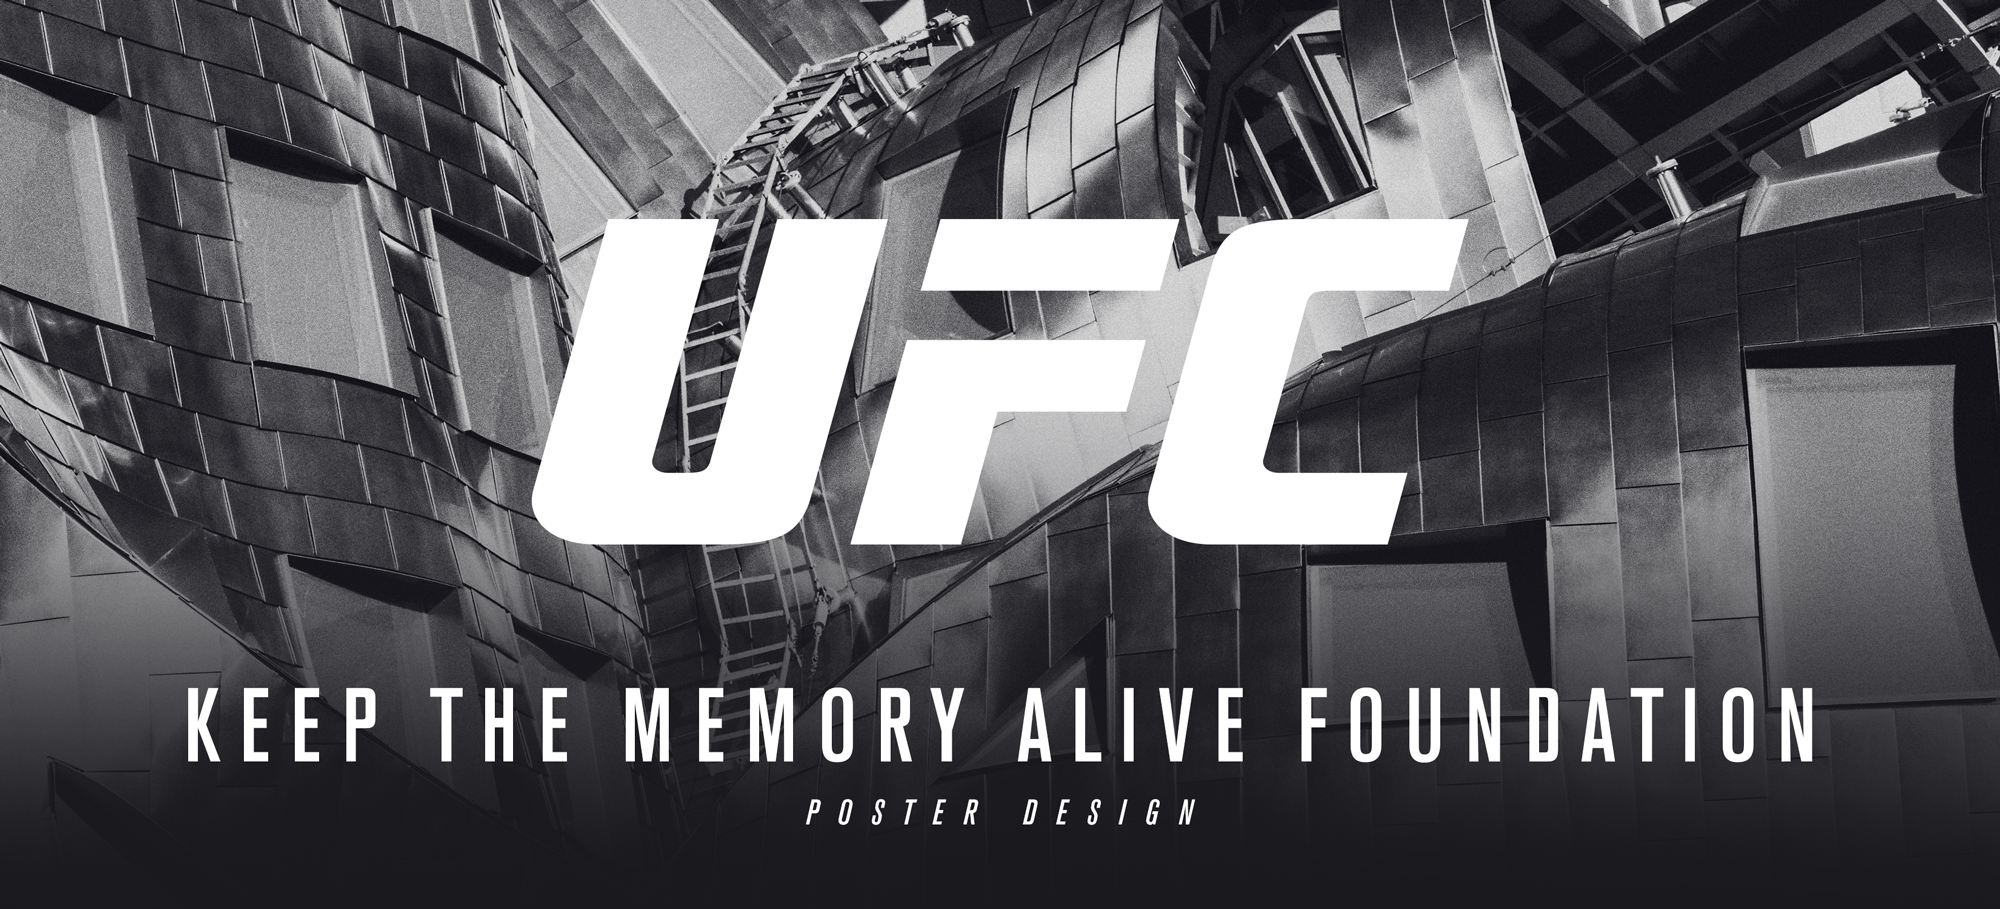

# Table of Contents
* [Introduction](#Introduction)
* [Importing Libraries](#Importing_Libraries)
* [Data Source](#Data_Source)
* [Preliminary Steps](#Preliminary_Steps)
    * [Data Acqusition](#Data_Acqusition)
    * [Data Description](#Data_Description)
    * [Data Preparation](#Data_Preparation)
    * [Feature Engineering](#Feature_Engineering)    
* [Correlation Analysis](#Correlation_Analysis)
    * [Analysing physical features vs wins by weight class](#physical_vs_wins_weight_class)
    * [Analysing by Groups](#Analysing_by_Groups)
    * [Stance vs. Wins](#Stance_vs._Wins)
    * [Striking vs. Wins](#Striking_vs._Wins)   
        * [Flyweight](#Striking_vs._Wins_Flyweight)
        * [Bantamweight](#Striking_vs._Wins_Bantamweight)    
        * [Featherweight](#Striking_vs._Wins_Featherweight)
        * [Lightweight](#Striking_vs._Wins_Lightweight)  
        * [Middleweight](#Striking_vs._Wins_Middleweight)
        * [Light Heavyweight](#Striking_vs._Wins_Light_Heavyweight)  
        * [Heavyweight](#Striking_vs._Wins_Heavyweight)
    * [Grappling vs. Wins](#Grappling_vs._Wins)
        * [Flyweight](#Grappling_vs._Wins_Flyweight)
        * [Bantamweight](#Grappling_vs._Wins_Bantamweight)    
        * [Featherweight](#Grappling_vs._Wins_Featherweight)
        * [Lightweight](#Grappling_vs._Wins_Lightweight)  
        * [Middleweight](#Grappling_vs._Wins_Middleweight)
        * [Light Heavyweight](#Grappling_vs._Wins_Light_Heavyweight)  
        * [Heavyweight](#Grappling_vs._Wins_Heavyweight)
    * [Physical features and grappling](#Physical_features_and_grappling)
    * [Physical features and striking](#Physical_features_and_striking)	
* [Conclusions](#Conclusions)
* [What else could be done](#What_else_could_be_done)

## Introduction

The Ultimate Fighting Championship (UFC) is an American mixed martial arts (MMA) promotion company based in Las Vegas, Nevada.  
UFC has revolutionized the fight business and today stands as a premium global sports brand, media content company and the largest Pay-Per-View (PPV) event provider in the world.  It is the largest MMA promotion in the world as of 2023.
In this project we'll be taking a look at the athlete's stats and determine whether there is any effect of one's skills on their professional record.

## Importing Libraries <a class="anchor" id="Importing_Libraries"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import spearmanr
from scipy.stats import ttest_ind

## Data Source <a class="anchor" id="Data_Source"></a>

The dataset is available on Kaggle at this [link](https://www.kaggle.com/datasets/asaniczka/ufc-fighters-statistics/data)

# Preliminary Steps

## Data Acquisition <a class="anchor" id="Data_Acquisition"></a>

In [3]:
df = pd.read_csv('ufc-fighters-statistics.csv')
df.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


## Data Description <a class="anchor" id="Data_Description"></a>

**name**: the name of the UFC athlete  
**nickname**: the nickname of the UFC athlete  
**wins**: the number of wins the athlete has in their career
**losses**: the number of losses the athlete has in their career  
**draws**: the number of draws the athlete has in their career  
**height_cm**: the height of the athlete in centimeters  
**weight_in_kg**: the weight of the athlete in kilograms  
**reach_in_cm**: the reach of the athlete in centimeters  
**stance**: the fighting stance of the athlete  
**date_of_birth**: the date of birth of the athlete  
**significant_strikes_landed_per_minute**: the number of significant strikes the athlete lands per minute  
**significant_striking_accuracy**: the significant striking accuracy coefficient  
**significant_strikes_absorbed_per_minute**: the number of significant strikes the athlete absorbs per minute  
**significant_strike_defence**: the coefficient showing how well the athlete defends significant striking  
**average_takedowns_landed_per_15_minutes**: the number of takedowns the athlete manages to get per 15 minutes  
**takedown_accuracy**: the coefficient showing how many takedowns of the athlete are successful  
**takedown_defense**: the coefficient showing how well the athlete defends takedowns  
**average_submissions_attempted_per_15_minutes**: the number of submissions the athlete attempts per 15 minutes

## Data Preparation <a class="anchor" id="Data_Preparation"></a>

In [4]:
for i in list(df.columns):
    print(i)

name
nickname
wins
losses
draws
height_cm
weight_in_kg
reach_in_cm
stance
date_of_birth
significant_strikes_landed_per_minute
significant_striking_accuracy
significant_strikes_absorbed_per_minute
significant_strike_defence
average_takedowns_landed_per_15_minutes
takedown_accuracy
takedown_defense
average_submissions_attempted_per_15_minutes


These column names are too long, it would be more convenient to shorten them:

In [5]:
subset_col = []

for i in list(df.columns):
    if len(i)>17:
        subset_col.append(i)
print(subset_col)

['significant_strikes_landed_per_minute', 'significant_striking_accuracy', 'significant_strikes_absorbed_per_minute', 'significant_strike_defence', 'average_takedowns_landed_per_15_minutes', 'average_submissions_attempted_per_15_minutes']


In [6]:
df.rename(columns={subset_col[0]: 'sig_strikes_minute', subset_col[1]: 'sig_strike_accuracy', subset_col[2]: 'sig_strikes_absorb_min', subset_col[3]: 'sig_strike_defence', subset_col[4]: 'avg_takedowns_per_15min', subset_col[5]: 'avg_sub_per_15min'}, inplace=True)

In [7]:
for i in list(df.columns):
    print(i)

name
nickname
wins
losses
draws
height_cm
weight_in_kg
reach_in_cm
stance
date_of_birth
sig_strikes_minute
sig_strike_accuracy
sig_strikes_absorb_min
sig_strike_defence
avg_takedowns_per_15min
takedown_accuracy
takedown_defense
avg_sub_per_15min


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     4111 non-null   object 
 1   nickname                 2257 non-null   object 
 2   wins                     4111 non-null   int64  
 3   losses                   4111 non-null   int64  
 4   draws                    4111 non-null   int64  
 5   height_cm                3813 non-null   float64
 6   weight_in_kg             4024 non-null   float64
 7   reach_in_cm              2184 non-null   float64
 8   stance                   3288 non-null   object 
 9   date_of_birth            2976 non-null   object 
 10  sig_strikes_minute       4111 non-null   float64
 11  sig_strike_accuracy      4111 non-null   float64
 12  sig_strikes_absorb_min   4111 non-null   float64
 13  sig_strike_defence       4111 non-null   float64
 14  avg_takedowns_per_15min 

We won't be needing columns 'nickname' and 'date_of_birth' so we're dropping them.

In [9]:
df.drop(columns=['nickname', 'date_of_birth'], axis=1, inplace=True)

In [10]:
df.head()

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,sig_strikes_minute,sig_strike_accuracy,sig_strikes_absorb_min,sig_strike_defence,avg_takedowns_per_15min,takedown_accuracy,takedown_defense,avg_sub_per_15min
0,Robert Drysdale,7,0,0,190.50,92.99,NaN,Orthodox,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,15,37,0,185.42,83.91,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,13,9,0,177.80,97.98,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,7,4,0,167.64,61.23,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,8,2,0,190.50,83.91,193.04,Orthodox,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


In [11]:
df.isna().sum()

name                          0
wins                          0
losses                        0
draws                         0
height_cm                   298
weight_in_kg                 87
reach_in_cm                1927
stance                      823
sig_strikes_minute            0
sig_strike_accuracy           0
sig_strikes_absorb_min        0
sig_strike_defence            0
avg_takedowns_per_15min       0
takedown_accuracy             0
takedown_defense              0
avg_sub_per_15min             0
dtype: int64

In [12]:
df.duplicated().sum()

0

There are quite a few NaN values.
Since we're going to be analyzing the effect of an MMA fighter's physical features on their performance we can't afford to have NaN values in columns **height_cm, weight_in_kg, reach_in_cm** so we'll have to drop rows with NaNs in them.   
As for the **stance** column we'll replace NaNs with 'free'

In [13]:
subset_cols = ['stance']
[df[col].fillna('Free', inplace=True) for col in subset_cols]

[None]

In [14]:
df['stance'].unique()

array(['Orthodox', 'Free', 'Southpaw', 'Switch', 'Sideways',
       'Open Stance'], dtype=object)

Dropping rows with NaNs in columns 'height_cm','weight_in_kg','reach_in_cm'

In [15]:
df.dropna(subset=['height_cm','weight_in_kg','reach_in_cm'], inplace=True)
df.isna().sum()

name                       0
wins                       0
losses                     0
draws                      0
height_cm                  0
weight_in_kg               0
reach_in_cm                0
stance                     0
sig_strikes_minute         0
sig_strike_accuracy        0
sig_strikes_absorb_min     0
sig_strike_defence         0
avg_takedowns_per_15min    0
takedown_accuracy          0
takedown_defense           0
avg_sub_per_15min          0
dtype: int64

## Feature Engineering <a class="anchor" id="Feature_Engineering"></a>

Since we don't have weight division data in our dataset, we'll assign it manually.  
This will obviuosly be an approximation and not full-proof but enough for us to perform analysis.

In [16]:
weight_class = pd.DataFrame({'from': [0, 58, 62, 67, 71, 85, 94],
'to': [57.9, 61.9, 66.9, 70.9, 84.9, 93.9, 120.9],
'value': ['Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Middleweight', 'Light Heavyweight', 'Heavyweight']})

In [17]:
def assign_weight_class(x):
    return weight_class.loc[(x >= weight_class['from']) & (x <= weight_class['to']), 'value'].squeeze()

df['weight_class'] = df['weight_in_kg'].apply(assign_weight_class)

In [18]:
df.groupby('weight_class')['name'].count()

weight_class
Bantamweight         311
Featherweight        275
Flyweight            331
Heavyweight          153
Light Heavyweight    174
Lightweight          362
Middleweight         577
Name: name, dtype: int64

# Correlation Analysis <a class="anchor" id="Correlation_Analysis"></a>

In [19]:
physical_features = ['height_cm', 'weight_in_kg', 'reach_in_cm']
                     
record = ['wins', 'losses', 'draws']
                
print(df[physical_features + record].describe())

         height_cm  weight_in_kg  reach_in_cm         wins       losses  \
count  2183.000000   2183.000000  2183.000000  2183.000000  2183.000000   
mean    177.493990     73.586395   181.810710    14.351351     5.504810   
std       9.018748     15.553930    10.682906     7.606245     3.944139   
min     152.400000     52.160000   147.320000     0.000000     0.000000   
25%     170.180000     61.230000   175.260000     9.000000     3.000000   
50%     177.800000     70.310000   182.880000    13.000000     5.000000   
75%     182.880000     83.910000   190.500000    18.000000     7.000000   
max     210.820000    120.200000   213.360000    91.000000    26.000000   

             draws  
count  2183.000000  
mean      0.180027  
std       0.535730  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       8.000000  


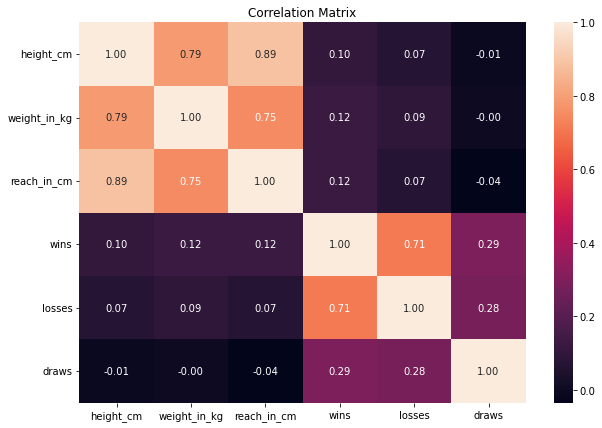

In [20]:
corr_matrix = df[physical_features + record].corr()

plt.figure(figsize=(10,7))
sns.heatmap(data = corr_matrix,
           annot=True,
           cmap="rocket",
           fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Correlation between physical features and record appears to be quite low judging by the correlation matrix.  
Interestingly enough, there is a strong positive correlation between losses and wins. In fact, there are only 70 UFC athletes who are undefeated

In [21]:
df.query('losses==0')['name'].count()    #only 70 UFC athletes are undefeated

70

Among the undefeated UFC athletes it's **Khabib Nurmagomedov** who holds the first place with a 12 wins lead:

In [22]:
df.query('losses==0').groupby('name')['wins'].sum().sort_values(ascending=False).head(10) 

name
Khabib Nurmagomedov    29
Azat Maksum            17
Shavkat Rakhmonov      17
Movsar Evloev          17
Umar Nurmagomedov      16
Michael Morales        16
Daniel Marcos          15
Ivan Shtyrkov          15
Aliaskhab Khizriev     14
Tatsuro Taira          14
Name: wins, dtype: int64

# Analysing physical features vs wins by weight class <a class="anchor" id="physical_vs_wins_weight_class"></a>

In [23]:
from matplotlib.gridspec import GridSpec

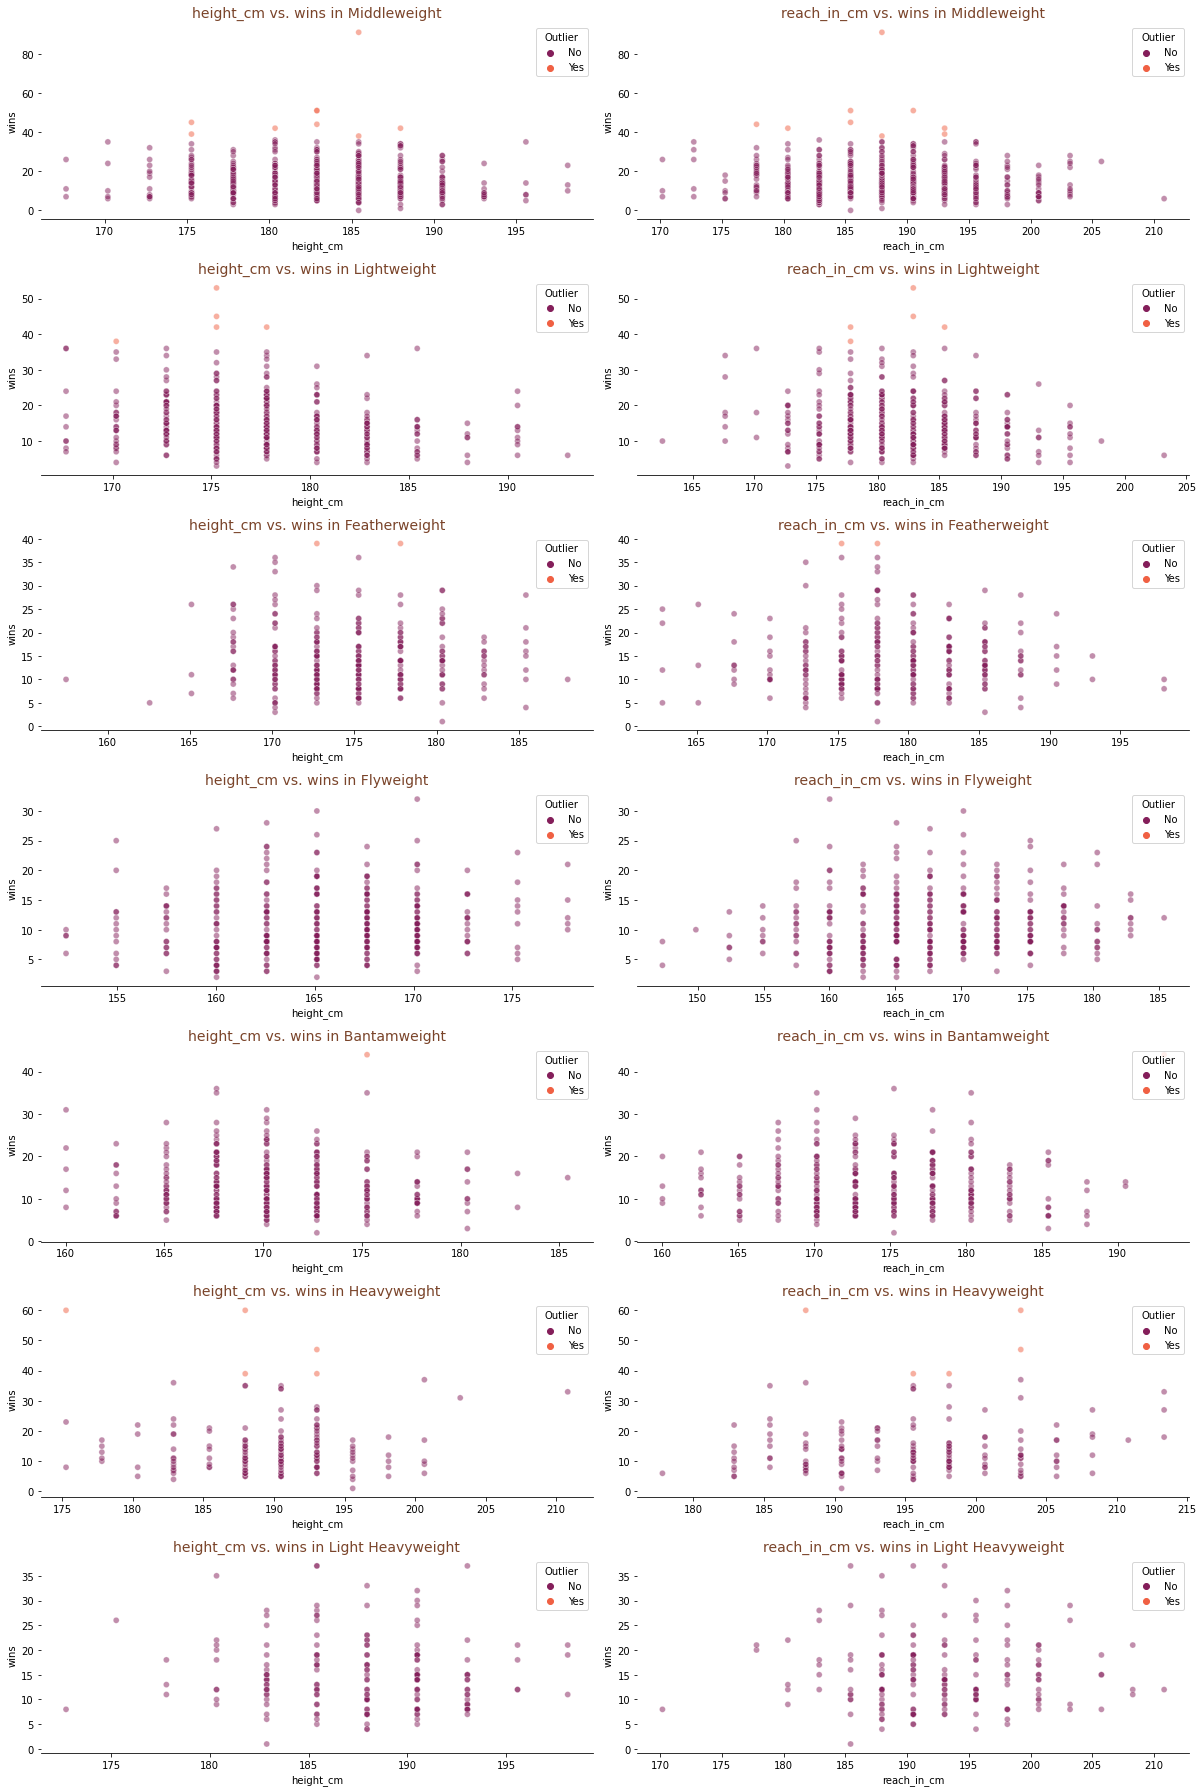

In [24]:
fig = plt.figure(figsize=(25, 25))
gs = GridSpec(ncols=3, nrows=7, figure=fig)

x=0
c=0
r=0
features = ['height_cm', 'reach_in_cm']   #not including weight since we will use the weight_class criteria 
wc = list(df['weight_class'].unique())

for weight in wc:
    for i, feature in enumerate(features):
        plt.subplot(gs[c,r])
        is_outlier = (df['wins'] >= df['wins'].mean() + df['wins'].std()*3)
        dt = df[df['weight_class'] == wc[x]]
        ax = sns.scatterplot(data = dt, x = dt[dt['weight_class'] == wc[x]][feature], y = dt[dt['weight_class'] == wc[x]]['wins'], hue = is_outlier, palette = 'rocket', alpha=0.5)
        handles, labels  =  ax.get_legend_handles_labels()
        ax.legend(handles, ['No', 'Yes'], loc='upper right', title = 'Outlier')
        plt.title(f'{feature} vs. wins in {weight}', color='#7A442A', fontsize=14)
        r+=1
    r=0
    x+=1
    c+=1

sns.despine(bottom=False, left=True)    
plt.tight_layout()  
plt.show()

***Fun Fact***: the most significant outlier in Middleweight is **Jeremy Horn** with the astounding 91-22-5 record:

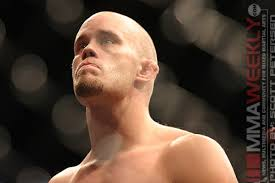

In [25]:
df[(df['height_cm'] > 180) & (df['weight_in_kg'] > 80) & (df['reach_in_cm'] > 180) & (df['wins'] > 80) ]

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,sig_strikes_minute,sig_strike_accuracy,sig_strikes_absorb_min,sig_strike_defence,avg_takedowns_per_15min,takedown_accuracy,takedown_defense,avg_sub_per_15min,weight_class
675,Jeremy Horn,91,22,5,185.42,83.91,187.96,Orthodox,1.19,39.0,1.99,55.0,1.83,38.0,29.0,1.1,Middleweight


## Analysing by Groups <a class="anchor" id="Analysing_by_Groups"></a>

In [26]:
df.groupby('height_cm')['wins'].agg(['mean', 'sum']).sort_values(by='mean', ascending=False).head(15)

,mean,sum
height_cm,,
210.82,33.000000,33
203.20,31.000000,31
200.66,15.800000,79
185.42,15.595376,2698
175.26,15.589862,3383
180.34,15.342541,2777
182.88,14.935065,3450
177.80,14.797357,3359
187.96,14.600000,1971


In [27]:
df.groupby('weight_in_kg')['wins'].agg(['mean', 'sum']).sort_values(by='mean', ascending=False).head(15)

,mean,sum
weight_in_kg,,
63.05,35.000000,35
104.78,24.000000,24
76.20,23.000000,23
112.04,21.000000,105
108.86,20.642857,289
109.32,20.000000,20
102.06,20.000000,60
112.49,19.500000,39
104.33,18.000000,180


In [28]:
df.groupby('weight_in_kg')['wins'].sum().sort_values(ascending=False).head(15)

weight_in_kg
70.31     5554
77.11     5140
61.23     4168
65.77     3969
83.91     3772
56.70     2715
92.99     2635
52.16     1001
120.20     488
108.86     289
113.40     245
104.33     180
117.93     156
111.13     119
112.04     105
Name: wins, dtype: int64

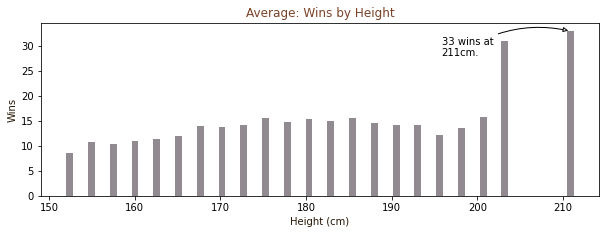

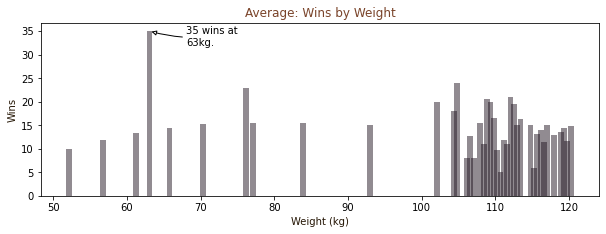

In [29]:
height_g = df.groupby('height_cm')['wins'].mean().reset_index()
weight_g = df.groupby('weight_in_kg')['wins'].mean().reset_index()

max_index_h = np.argmax(height_g['wins'])
max_x_h = height_g['height_cm'][max_index_h]
max_y_h = height_g['wins'][max_index_h]


plt.figure(figsize=(10, 7))

plt.subplot(2, 1, 1)
plt.bar(height_g['height_cm'], height_g['wins'], color='#241924', alpha=0.5)
plt.xlabel('Height (cm)', color='#251605')
plt.ylabel('Wins', color='#251605')
plt.title('Average: Wins by Height', color='#7A442A')

arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3,rad=-0.2",fc="w")

plt.annotate('{:.0f} wins at \n{:.0f}cm.'.format(max_y_h, max_x_h),
            xy=(max_x_h, max_y_h),
            xytext=(max_x_h-15, max_y_h-5),
            arrowprops=arrowprops)

max_index_w = np.argmax(weight_g['wins'])
max_x_w = weight_g['weight_in_kg'][max_index_w]
max_y_w = weight_g['wins'][max_index_w]


plt.figure(figsize=(10, 7))

plt.subplot(2, 1, 2)
plt.bar(weight_g['weight_in_kg'], weight_g['wins'], color='#241924', alpha=0.5)
plt.xlabel('Weight (kg)', color='#251605')
plt.ylabel('Wins', color='#251605')
plt.title('Average: Wins by Weight', color='#7A442A')

arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3,rad=-0.1",fc="w")

plt.annotate('{:.0f} wins at \n{:.0f}kg.'.format(max_y_w, max_x_w),
            xy=(max_x_w, max_y_w),
            xytext=(max_x_w+5, max_y_w-3),
            arrowprops=arrowprops)


plt.show()

The charts above show that the maximum amount of wins by height belongs to athletes at 211 cm.

The mean of wins is so different from the other heights because we have only 7 athletes over 200cm tall in our dataset:

In [30]:
df.query('height_cm > 200')['name'].count()

7

The charts above also show that the maximum amount of wins by weight belongs to athletes at 65kg.

The mean of wins is so different from the other weights because we have only 1 athlete at 63.05kg in our dataset:

In [31]:
df.groupby('weight_in_kg')['name'].count()

weight_in_kg
52.16     100
56.70     231
61.23     311
63.05       1
65.77     274
70.31     362
76.20       1
77.11     332
83.91     244
92.99     174
102.06      3
104.33     10
104.78      1
106.14      1
106.59      5
107.05      1
107.95      2
108.41      1
108.86     14
109.32      1
109.77      4
110.22      3
110.68      1
111.13     10
111.58      1
112.04      5
112.49      2
112.94      2
113.40     15
114.76      2
115.21      1
115.67      5
116.12      1
116.57      2
117.03      2
117.93     12
118.84      2
119.29      2
119.75      9
120.20     33
Name: name, dtype: int64

Text(0.5, 1.0, 'Total wins by weight_class')

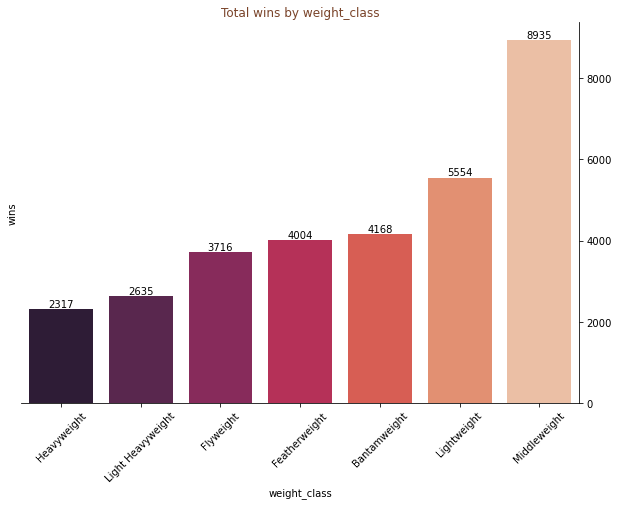

In [32]:
w = df.groupby('weight_class')['wins'].sum().round(2).reset_index()

fig = plt.figure(figsize=(10,7))

ax = sns.barplot(data = w, x = 'weight_class', y = 'wins', palette='rocket', order=w.sort_values('wins').weight_class)

plt.xticks(rotation=45)

sns.despine(left=True, right=False) 

for i in ax.containers:
    ax.bar_label(i,)

plt.title('Total wins by weight_class', color = '#7A442A')

Text(0.5, 1.0, 'Avg wins by weight_class')

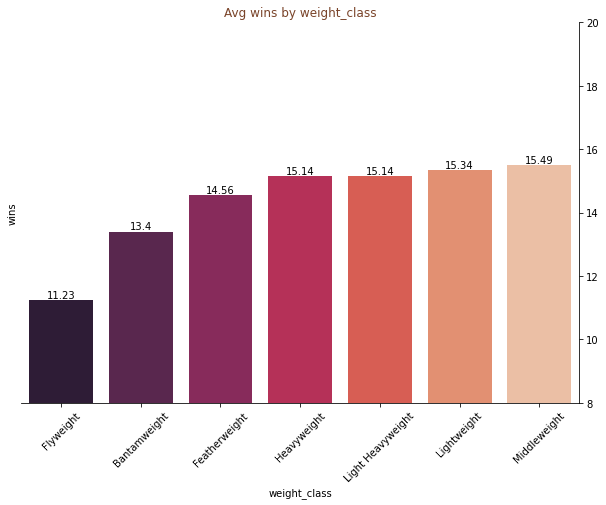

In [33]:
a = df.groupby('weight_class')['wins'].mean().round(2).reset_index()

fig = plt.figure(figsize=(10,7))

ax = sns.barplot(data = a, x = 'weight_class', y = 'wins', palette='rocket', order=a.sort_values('wins').weight_class)

plt.xticks(rotation=45)

sns.despine(left=True, right=False)

ax.set(ylim=(8, 20))

for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Avg wins by weight_class', color = '#7A442A')

The Avg wins by weight_class above demonstrates that the average amount of wins is the highest in Middleweights and the lowest in Flyweights.  
Let's dig deeper and see if there is actually any statistical significance to the difference we observe here.

We'll be using Welch’s t-Test to determine whether weight class influences the outcome of the fight because the variance of our two samples as well as sample sizes are not equal.   
Our null hypothesis is H0: middleweight mean of wins = flyweight mean of wins  
Our alternative hypothesis is H1: middleweight mean of wins > flyweight mean of wins  

In [34]:
mw = df.query('weight_class == "Middleweight"')['wins']  
fw = df.query('weight_class == "Flyweight"')['wins']  

alpha = 0.05
t_crit, p_value = ttest_ind(mw, fw, equal_var=False)

if alpha <  p_value:
    print('Middleweight mean of wins is bigger \nT-statictic: {:.2f}\np-value: {:.2f}'.format(t_crit, p_value))
else:
    print('No significant statictic difference detected, the difference in samples is accidental\nT-statictic: {:.2f}, p-value: {:.2f}'.format(t_crit, p_value))



No significant statictic difference detected, the difference in samples is accidental
T-statictic: 9.29, p-value: 0.00


## Stance vs. Wins <a class="anchor" id="Stance_vs._Wins"></a>

Let's see if there is any significant link between an athlete's stance and the number of wins

In [35]:
st = df[['stance', 'wins']]
st

,stance,wins
4,Orthodox,8
8,Orthodox,9
11,Southpaw,5
17,Southpaw,16
22,Orthodox,6
...,...,...
4096,Orthodox,6
4099,Orthodox,7
4102,Southpaw,4
4109,Southpaw,6


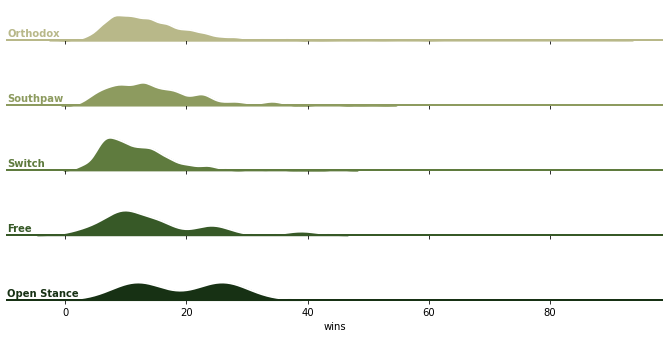

In [36]:
palette = sns.cubehelix_palette(5, start=2, rot=-.25, light=.7)
g = sns.FacetGrid(st, row="stance", hue="stance", aspect=10, height=1, palette=palette)


g.map(sns.kdeplot, 'wins',
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, 'wins', clip_on=False, color="w", lw=2, bw_adjust=.5)


g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, 'wins')

g.figure.subplots_adjust()


g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

All of the stance types exhibit approximately the same density of the number of wins: regardless of the stance, the number of wins remains between 0 and 20 with only the open stance having a wider "density window" - up to ~30

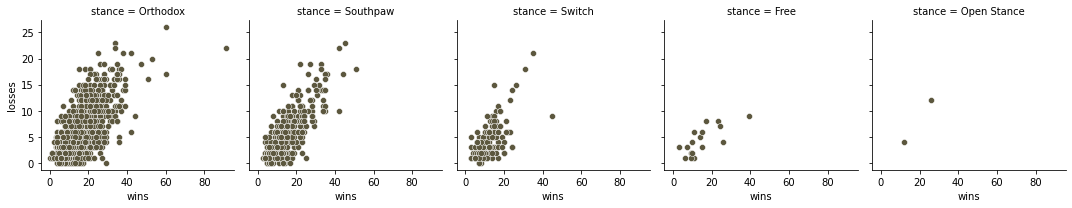

In [37]:
FG = sns.FacetGrid(df, col='stance')
FG.map_dataframe(sns.scatterplot, x = 'wins', y = 'losses', color = '#5C573E')

There are only 2 athletes in our dataset using the open stance, namely Krzysztof Soszynski and Nate Quarry.

In [38]:
df.query('stance=="Open Stance"').groupby('name')['wins'].sum()

name
Krzysztof Soszynski    26
Nate Quarry            12
Name: wins, dtype: int64

We can also take a look at the average amount of wins by stance type:

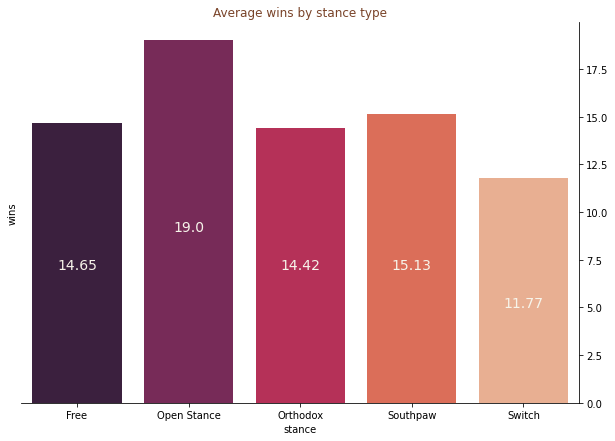

In [39]:
stance_avg = df.groupby('stance')['wins'].mean().reset_index()

plt.figure(figsize=(10,7))


sns.barplot(data = stance_avg, x = 'stance', y = 'wins', palette='rocket')
plt.title('Average wins by stance type', color = '#7A442A')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i].round(2), ha = 'center',color = '#F7F4EA', fontsize=14)
        
addlabels(stance_avg['stance'], stance_avg['wins'])

sns.despine(left=True, right=False) 

The open stance exhibits a higher average of wins but, as we have already found out, there are only 2 athletes using this type of stance in our dataset so the conclusion that the stance determines the win would be inconsequential.

## Striking vs. Wins <a class="anchor" id="Striking_vs._Wins"></a>

Since the stance-wins analysis yielded no substantial result, let's see whether striking statistics have any effect on winning

In [40]:
striking_stats = ['sig_strikes_minute', 'sig_strike_accuracy',
       'sig_strikes_absorb_min', 'sig_strike_defence']

corr = df[striking_stats + record].corr()
np.round(corr, 2)

,sig_strikes_minute,sig_strike_accuracy,sig_strikes_absorb_min,sig_strike_defence,wins,losses,draws
sig_strikes_minute,1.00,0.35,0.40,0.21,-0.06,-0.14,-0.07
sig_strike_accuracy,0.35,1.00,-0.00,0.06,-0.00,-0.11,-0.02
sig_strikes_absorb_min,0.40,-0.00,1.00,-0.25,-0.19,-0.10,-0.08
sig_strike_defence,0.21,0.06,-0.25,1.00,0.20,0.15,0.08
wins,-0.06,-0.00,-0.19,0.20,1.00,0.71,0.29
losses,-0.14,-0.11,-0.10,0.15,0.71,1.00,0.28
draws,-0.07,-0.02,-0.08,0.08,0.29,0.28,1.00


<AxesSubplot:>

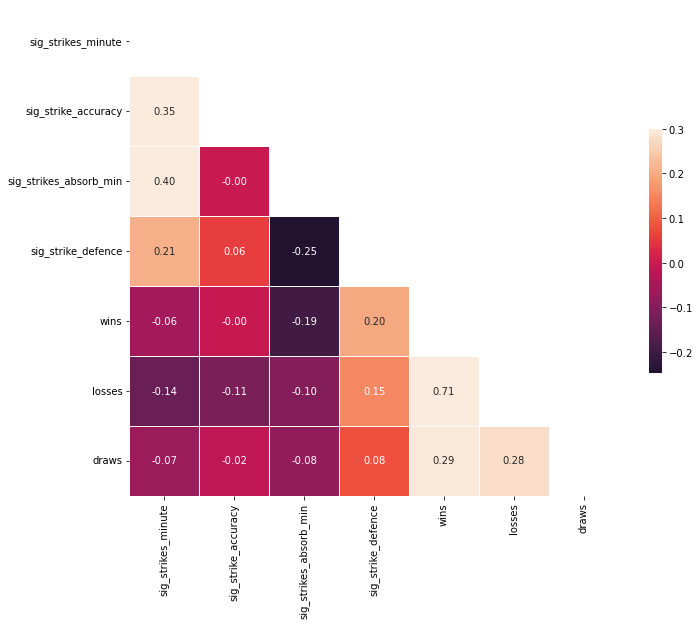

In [41]:
corr_matrix = df[striking_stats + record].corr()


mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap="rocket", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [42]:
striking = list(df[striking_stats].columns)
rec = list(df[record].columns)
striking_len = len(striking)
rec_len = len(rec)
l = []
coefs = []
striking_record_corr = {}
x=0

for i in range(striking_len):
    for j in range(rec_len):
        strike_rec = striking[i]+' vs '+rec[j]
        l.append(strike_rec)
        spearman_coef = spearmanr(df[striking[i]], df[record[j]]).correlation
        coefs.append(spearman_coef)
        
for i in l:
    striking_record_corr[l[x]] = coefs[x]
    x+=1
    
t = pd.DataFrame(striking_record_corr.items(), columns=['stats', 'corr_coef'])
t.sort_values(by='corr_coef', ascending=False)

,stats,corr_coef
9,sig_strike_defence vs wins,0.242637
10,sig_strike_defence vs losses,0.149192
11,sig_strike_defence vs draws,0.088286
0,sig_strikes_minute vs wins,0.011584
5,sig_strike_accuracy vs draws,-0.015588
3,sig_strike_accuracy vs wins,-0.025452
2,sig_strikes_minute vs draws,-0.044140
7,sig_strikes_absorb_min vs losses,-0.059612
8,sig_strikes_absorb_min vs draws,-0.079572
1,sig_strikes_minute vs losses,-0.094933


No strong correlataion detected between striking stats and wins/losses/draws

Let's now take a closer look at an athlete's striking skills and number of wins by weight class

### Flyweight <a class="anchor" id="Striking_vs._Wins_Flyweight"></a>

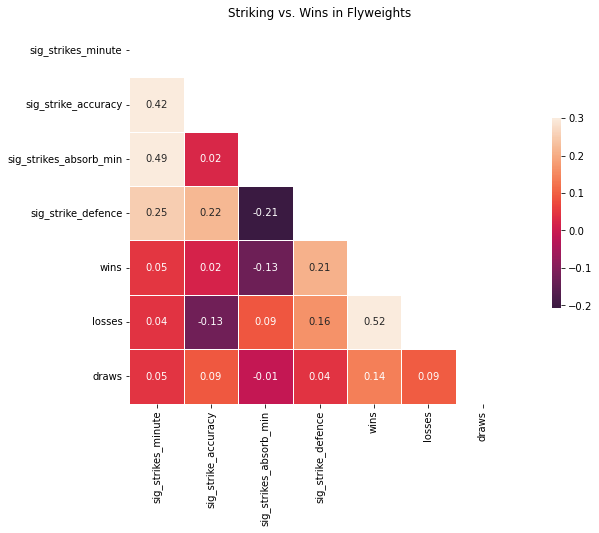

In [43]:
fw = df.query('weight_class=="Flyweight"')[striking_stats + record]

corr_matrix = fw[striking_stats + record].corr()

plt.figure(figsize = (15,7))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap="rocket", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Striking vs. Wins in Flyweights')

plt.show()

In [44]:
striking = list(fw[striking_stats].columns)
rec = list(fw[record].columns)
striking_len = len(striking)
rec_len = len(rec)
l = []
coefs = []
striking_record_corr = {}
x=0

for i in range(striking_len):
    for j in range(rec_len):
        striking_rec = striking[i]+' vs '+rec[j]
        l.append(striking_rec)
        spearman_coef = spearmanr(fw[striking[i]], fw[record[j]]).correlation
        coefs.append(spearman_coef)
        
for i in l:
    striking_record_corr[l[x]] = coefs[x]
    x+=1
    
t = pd.DataFrame(striking_record_corr.items(), columns=['stats', 'corr_coef'])
pd.set_option('display.max_colwidth', None)
t.sort_values(by='corr_coef', ascending=False)

,stats,corr_coef
9,sig_strike_defence vs wins,0.247162
10,sig_strike_defence vs losses,0.160743
7,sig_strikes_absorb_min vs losses,0.135039
0,sig_strikes_minute vs wins,0.112623
5,sig_strike_accuracy vs draws,0.105930
1,sig_strikes_minute vs losses,0.101461
11,sig_strike_defence vs draws,0.047874
2,sig_strikes_minute vs draws,0.027550
3,sig_strike_accuracy vs wins,0.025131
8,sig_strikes_absorb_min vs draws,-0.020965


No significant correlation detected between striking stats and wins in Flyweights

### Bantamweight <a class="anchor" id="Striking_vs._Wins_Bantamweight"></a>

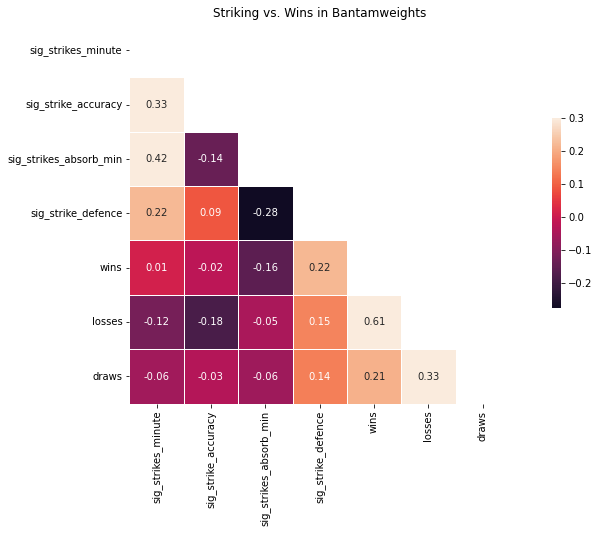

In [45]:
bw = df.query('weight_class=="Bantamweight"')[striking_stats + record]

corr_matrix = bw[striking_stats + record].corr()

plt.figure(figsize = (15,7))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap="rocket", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Striking vs. Wins in Bantamweights')

plt.show()

In [46]:
striking = list(bw[striking_stats].columns)
rec = list(bw[record].columns)
striking_len = len(striking)
rec_len = len(rec)
l = []
coefs = []
striking_record_corr = {}
x=0

for i in range(striking_len):
    for j in range(rec_len):
        striking_rec = striking[i]+' vs '+rec[j]
        l.append(striking_rec)
        spearman_coef = spearmanr(bw[striking[i]], bw[record[j]]).correlation
        coefs.append(spearman_coef)
        
for i in l:
    striking_record_corr[l[x]] = coefs[x]
    x+=1
    
t = pd.DataFrame(striking_record_corr.items(), columns=['stats', 'corr_coef'])
pd.set_option('display.max_colwidth', None)
t.sort_values(by='corr_coef', ascending=False)

,stats,corr_coef
9,sig_strike_defence vs wins,0.237276
11,sig_strike_defence vs draws,0.154193
10,sig_strike_defence vs losses,0.116242
0,sig_strikes_minute vs wins,0.101498
7,sig_strikes_absorb_min vs losses,0.019506
8,sig_strikes_absorb_min vs draws,-0.019139
3,sig_strike_accuracy vs wins,-0.029391
2,sig_strikes_minute vs draws,-0.036441
5,sig_strike_accuracy vs draws,-0.067402
1,sig_strikes_minute vs losses,-0.072376


No significant correlation detected between striking stats and wins in Bantamweights

### Featherweight <a class="anchor" id="Striking_vs._Wins_Featherweight"></a>

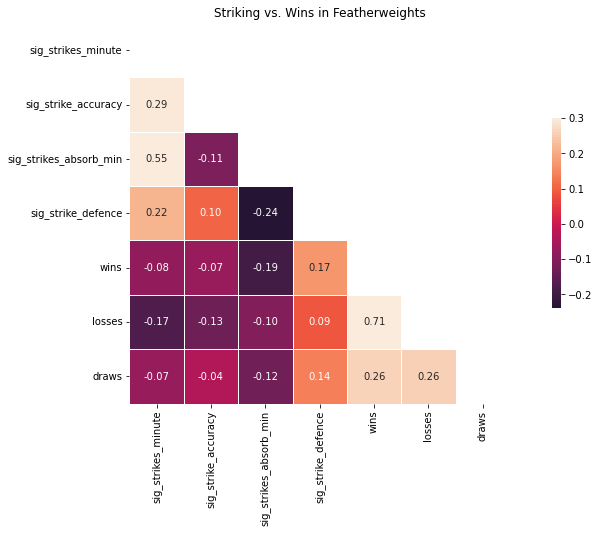

In [47]:
feathw = df.query('weight_class=="Featherweight"')[striking_stats + record]

corr_matrix = feathw[striking_stats + record].corr()

plt.figure(figsize = (15,7))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap="rocket", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Striking vs. Wins in Featherweights')

plt.show()

In [48]:
striking = list(feathw[striking_stats].columns)
rec = list(feathw[record].columns)
striking_len = len(striking)
rec_len = len(rec)
l = []
coefs = []
striking_record_corr = {}
x=0

for i in range(striking_len):
    for j in range(rec_len):
        striking_rec = striking[i]+' vs '+rec[j]
        l.append(striking_rec)
        spearman_coef = spearmanr(feathw[striking[i]], feathw[record[j]]).correlation
        coefs.append(spearman_coef)
        
for i in l:
    striking_record_corr[l[x]] = coefs[x]
    x+=1
    
t = pd.DataFrame(striking_record_corr.items(), columns=['stats', 'corr_coef'])
pd.set_option('display.max_colwidth', None)
t.sort_values(by='corr_coef', ascending=False)

,stats,corr_coef
9,sig_strike_defence vs wins,0.219894
11,sig_strike_defence vs draws,0.117445
10,sig_strike_defence vs losses,0.083075
5,sig_strike_accuracy vs draws,0.002155
0,sig_strikes_minute vs wins,-0.022436
7,sig_strikes_absorb_min vs losses,-0.033663
2,sig_strikes_minute vs draws,-0.042092
3,sig_strike_accuracy vs wins,-0.072569
8,sig_strikes_absorb_min vs draws,-0.099422
1,sig_strikes_minute vs losses,-0.128097


No significant correlation detected between striking stats and wins in Featherweights

### Lightweight <a class="anchor" id="Striking_vs._Wins_Lightweight"></a>

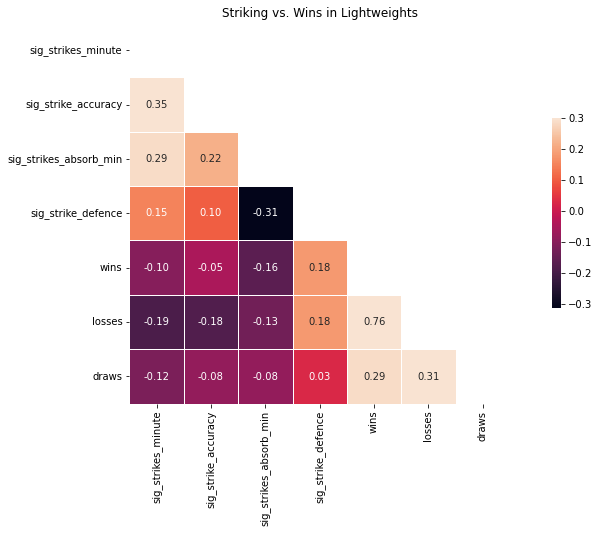

In [49]:
lw = df.query('weight_class=="Lightweight"')[striking_stats + record]

corr_matrix = lw[striking_stats + record].corr()

plt.figure(figsize = (15,7))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap="rocket", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Striking vs. Wins in Lightweights')

plt.show()

In [50]:
striking = list(lw[striking_stats].columns)
rec = list(lw[record].columns)
striking_len = len(striking)
rec_len = len(rec)
l = []
coefs = []
striking_record_corr = {}
x=0

for i in range(striking_len):
    for j in range(rec_len):
        striking_rec = striking[i]+' vs '+rec[j]
        l.append(striking_rec)
        spearman_coef = spearmanr(lw[striking[i]], lw[record[j]]).correlation
        coefs.append(spearman_coef)
        
for i in l:
    striking_record_corr[l[x]] = coefs[x]
    x+=1
    
t = pd.DataFrame(striking_record_corr.items(), columns=['stats', 'corr_coef'])
pd.set_option('display.max_colwidth', None)
t.sort_values(by='corr_coef', ascending=False)

,stats,corr_coef
9,sig_strike_defence vs wins,0.230760
10,sig_strike_defence vs losses,0.230436
11,sig_strike_defence vs draws,0.074686
0,sig_strikes_minute vs wins,-0.016117
3,sig_strike_accuracy vs wins,-0.065854
5,sig_strike_accuracy vs draws,-0.079989
2,sig_strikes_minute vs draws,-0.096188
8,sig_strikes_absorb_min vs draws,-0.100175
7,sig_strikes_absorb_min vs losses,-0.124553
1,sig_strikes_minute vs losses,-0.156898


No significant correlation detected between striking stats and wins in Lightweights

### Middleweight <a class="anchor" id="Striking_vs._Wins_Middleweight"></a>

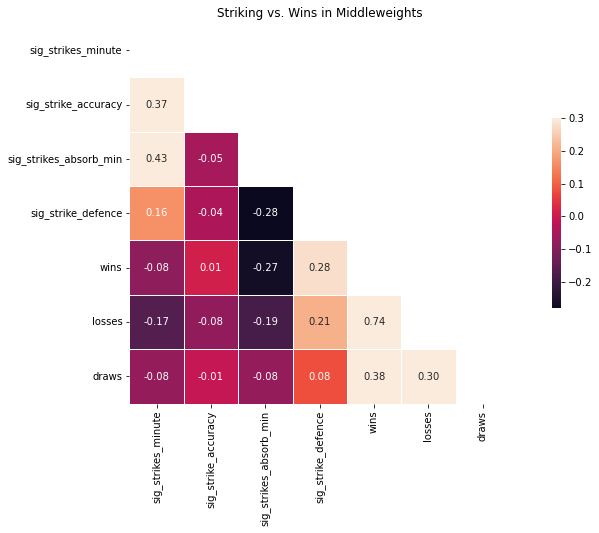

In [51]:
mw = df.query('weight_class=="Middleweight"')[striking_stats + record]

corr_matrix = mw[striking_stats + record].corr()

plt.figure(figsize = (15,7))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap="rocket", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Striking vs. Wins in Middleweights')

plt.show()

In [52]:
striking = list(mw[striking_stats].columns)
rec = list(mw[record].columns)
striking_len = len(striking)
rec_len = len(rec)
l = []
coefs = []
striking_record_corr = {}
x=0

for i in range(striking_len):
    for j in range(rec_len):
        striking_rec = striking[i]+' vs '+rec[j]
        l.append(striking_rec)
        spearman_coef = spearmanr(mw[striking[i]], mw[record[j]]).correlation
        coefs.append(spearman_coef)
        
for i in l:
    striking_record_corr[l[x]] = coefs[x]
    x+=1
    
t = pd.DataFrame(striking_record_corr.items(), columns=['stats', 'corr_coef'])
pd.set_option('display.max_colwidth', None)
t.sort_values(by='corr_coef', ascending=False)

,stats,corr_coef
9,sig_strike_defence vs wins,0.323188
10,sig_strike_defence vs losses,0.189869
11,sig_strike_defence vs draws,0.057765
0,sig_strikes_minute vs wins,-0.022034
5,sig_strike_accuracy vs draws,-0.042504
3,sig_strike_accuracy vs wins,-0.049990
2,sig_strikes_minute vs draws,-0.056891
8,sig_strikes_absorb_min vs draws,-0.083843
1,sig_strikes_minute vs losses,-0.136692
4,sig_strike_accuracy vs losses,-0.156078


Strong positive correlation (coef>0.3) detected between significant strikes defence and wins in Middleweights

### Light Heavyweight <a class="anchor" id="Striking_vs._Wins_Light_Heavyweight"></a>

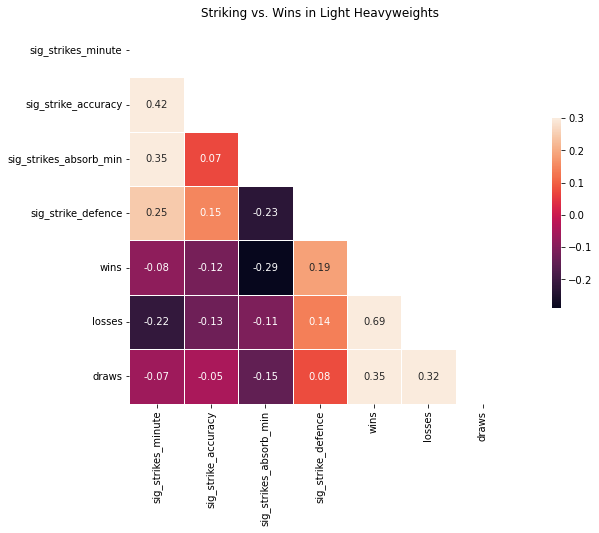

In [53]:
lhw = df.query('weight_class=="Light Heavyweight"')[striking_stats + record]

corr_matrix = lhw[striking_stats + record].corr()

plt.figure(figsize = (15,7))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap="rocket", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Striking vs. Wins in Light Heavyweights')

plt.show()

In [54]:
striking = list(lhw[striking_stats].columns)
rec = list(lhw[record].columns)
striking_len = len(striking)
rec_len = len(rec)
l = []
coefs = []
striking_record_corr = {}
x=0

for i in range(striking_len):
    for j in range(rec_len):
        striking_rec = striking[i]+' vs '+rec[j]
        l.append(striking_rec)
        spearman_coef = spearmanr(lhw[striking[i]], lhw[record[j]]).correlation
        coefs.append(spearman_coef)
        
for i in l:
    striking_record_corr[l[x]] = coefs[x]
    x+=1
    
t = pd.DataFrame(striking_record_corr.items(), columns=['stats', 'corr_coef'])
pd.set_option('display.max_colwidth', None)
t.sort_values(by='corr_coef', ascending=False)

,stats,corr_coef
9,sig_strike_defence vs wins,0.214402
10,sig_strike_defence vs losses,0.179109
11,sig_strike_defence vs draws,0.132196
2,sig_strikes_minute vs draws,0.001499
5,sig_strike_accuracy vs draws,-0.022034
0,sig_strikes_minute vs wins,-0.054499
7,sig_strikes_absorb_min vs losses,-0.130587
3,sig_strike_accuracy vs wins,-0.139284
8,sig_strikes_absorb_min vs draws,-0.166686
4,sig_strike_accuracy vs losses,-0.176550


Strong negative correlation (coef>|0.3|) detected between significant strikes absorbed per minute and wins in Light Heavyweights

### Heavyweight <a class="anchor" id="Striking_vs._Wins_Heavyweight"></a>

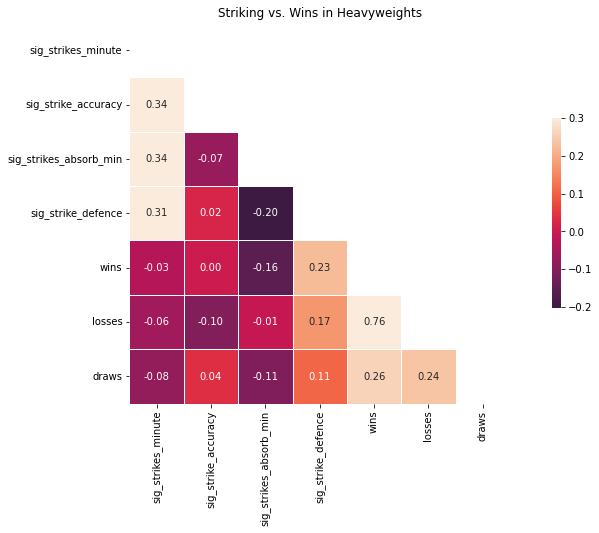

In [55]:
hw = df.query('weight_class=="Heavyweight"')[striking_stats + record]

corr_matrix = hw[striking_stats + record].corr()

plt.figure(figsize = (15,7))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap="rocket", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Striking vs. Wins in Heavyweights')

plt.show()

In [56]:
striking = list(hw[striking_stats].columns)
rec = list(hw[record].columns)
striking_len = len(striking)
rec_len = len(rec)
l = []
coefs = []
striking_record_corr = {}
x=0

for i in range(striking_len):
    for j in range(rec_len):
        striking_rec = striking[i]+' vs '+rec[j]
        l.append(striking_rec)
        spearman_coef = spearmanr(hw[striking[i]], hw[record[j]]).correlation
        coefs.append(spearman_coef)
        
for i in l:
    striking_record_corr[l[x]] = coefs[x]
    x+=1
    
t = pd.DataFrame(striking_record_corr.items(), columns=['stats', 'corr_coef'])
pd.set_option('display.max_colwidth', None)
t.sort_values(by='corr_coef', ascending=False)

,stats,corr_coef
9,sig_strike_defence vs wins,0.252181
10,sig_strike_defence vs losses,0.123618
11,sig_strike_defence vs draws,0.092669
7,sig_strikes_absorb_min vs losses,0.075806
0,sig_strikes_minute vs wins,0.067941
5,sig_strike_accuracy vs draws,0.042536
1,sig_strikes_minute vs losses,0.006825
3,sig_strike_accuracy vs wins,0.005327
2,sig_strikes_minute vs draws,-0.075855
8,sig_strikes_absorb_min vs draws,-0.100995


No significant correlation detected between striking stats and wins in Heavyweights

## Grappling vs. Wins <a class="anchor" id="Grappling_vs._Wins"></a>

The next logical step would be to analyze the correlation between grappling skills and wins

In [57]:
grappling_stats = ['avg_takedowns_per_15min', 'takedown_accuracy', 'takedown_defense', 'avg_sub_per_15min']

corr = df[grappling_stats + record].corr()
np.round(corr, 2)

,avg_takedowns_per_15min,takedown_accuracy,takedown_defense,avg_sub_per_15min,wins,losses,draws
avg_takedowns_per_15min,1.00,0.49,-0.00,0.18,0.03,-0.08,-0.00
takedown_accuracy,0.49,1.00,0.18,0.11,0.14,0.09,0.03
takedown_defense,-0.00,0.18,1.00,-0.12,0.15,0.09,0.02
avg_sub_per_15min,0.18,0.11,-0.12,1.00,0.06,0.04,0.01
wins,0.03,0.14,0.15,0.06,1.00,0.71,0.29
losses,-0.08,0.09,0.09,0.04,0.71,1.00,0.28
draws,-0.00,0.03,0.02,0.01,0.29,0.28,1.00


<AxesSubplot:>

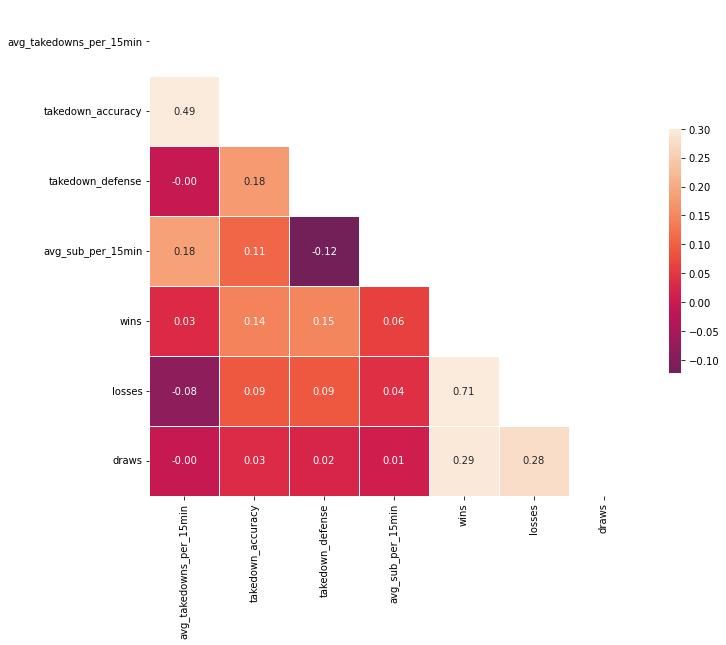

In [58]:
corr_matrix = df[grappling_stats + record].corr()


mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


f, ax = plt.subplots(figsize=(11, 9))



sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap="rocket", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The correlation matrix identifies weak positive correlation between takedown accuracy/defence and number of wins.  
Let's take a closer look using Spearman correlation coefficients

In [59]:
grappling = list(df[grappling_stats].columns)
rec = list(df[record].columns)
grappling_len = len(grappling)
rec_len = len(rec)
l = []
coefs = []
grappling_record_corr = {}
x=0

for i in range(grappling_len):
    for j in range(rec_len):
        grappling_rec = grappling[i]+' vs '+rec[j]
        l.append(grappling_rec)
        spearman_coef = spearmanr(df[grappling[i]], df[record[j]]).correlation
        coefs.append(spearman_coef)
        
for i in l:
    grappling_record_corr[l[x]] = coefs[x]
    x+=1
    
t = pd.DataFrame(grappling_record_corr.items(), columns=['stats', 'corr_coef'])
pd.set_option('display.max_colwidth', None)
t.sort_values(by='corr_coef', ascending=False)

,stats,corr_coef
9,avg_sub_per_15min vs wins,0.245417
10,avg_sub_per_15min vs losses,0.219929
3,takedown_accuracy vs wins,0.192196
6,takedown_defense vs wins,0.168263
0,avg_takedowns_per_15min vs wins,0.143373
4,takedown_accuracy vs losses,0.114719
7,takedown_defense vs losses,0.055737
11,avg_sub_per_15min vs draws,0.051750
8,takedown_defense vs draws,0.031380
5,takedown_accuracy vs draws,0.029712


No strong correlation between grappling skills and record identified.

Another point of perspective is determining whether there is a difference in the correlation between grappling skills and wins by weight category.

In [60]:
df.groupby('weight_class')[grappling_stats].mean().round(2)

,avg_takedowns_per_15min,takedown_accuracy,takedown_defense,avg_sub_per_15min
weight_class,,,,
Bantamweight,1.51,32.13,54.68,0.53
Featherweight,1.57,32.51,53.52,0.62
Flyweight,1.53,35.31,51.11,0.60
Heavyweight,1.49,33.54,54.01,0.49
Light Heavyweight,1.50,31.64,55.02,0.48
Lightweight,1.50,32.61,52.94,0.64
Middleweight,1.64,37.51,53.77,0.70


On average, middleweights exhibit a better level of grappling with the only exception being takedown defence.

### Flyweight <a class="anchor" id="Grappling_vs._Wins_Flyweight"></a>

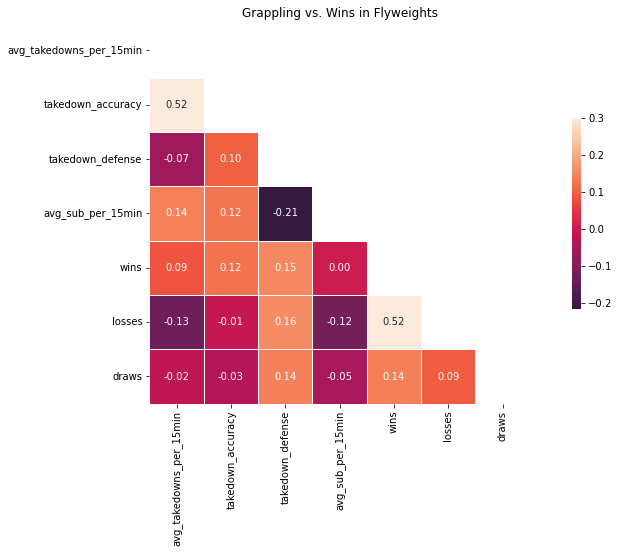

In [61]:
fw = df.query('weight_class=="Flyweight"')[grappling_stats + record]

corr_matrix = fw[grappling_stats + record].corr()

plt.figure(figsize = (15,7))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap="rocket", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Grappling vs. Wins in Flyweights')

plt.show()

In [62]:
grappling = list(fw[grappling_stats].columns)
rec = list(fw[record].columns)
grappling_len = len(grappling)
rec_len = len(rec)
l = []
coefs = []
grappling_record_corr = {}
x=0

for i in range(grappling_len):
    for j in range(rec_len):
        grappling_rec = grappling[i]+' vs '+rec[j]
        l.append(grappling_rec)
        spearman_coef = spearmanr(fw[grappling[i]], fw[record[j]]).correlation
        coefs.append(spearman_coef)
        
for i in l:
    grappling_record_corr[l[x]] = coefs[x]
    x+=1
    
t = pd.DataFrame(grappling_record_corr.items(), columns=['stats', 'corr_coef'])
pd.set_option('display.max_colwidth', None)
t.sort_values(by='corr_coef', ascending=False)

,stats,corr_coef
9,avg_sub_per_15min vs wins,0.188550
6,takedown_defense vs wins,0.157721
8,takedown_defense vs draws,0.147838
0,avg_takedowns_per_15min vs wins,0.136462
3,takedown_accuracy vs wins,0.132787
7,takedown_defense vs losses,0.125226
10,avg_sub_per_15min vs losses,0.061097
4,takedown_accuracy vs losses,0.023242
2,avg_takedowns_per_15min vs draws,0.015160
11,avg_sub_per_15min vs draws,0.015052


No strong correlation detected between grappling stats and wins in Flyweights.

### Bantamweight  <a class="anchor" id="Grappling_vs._Wins_Bantamweight"></a>

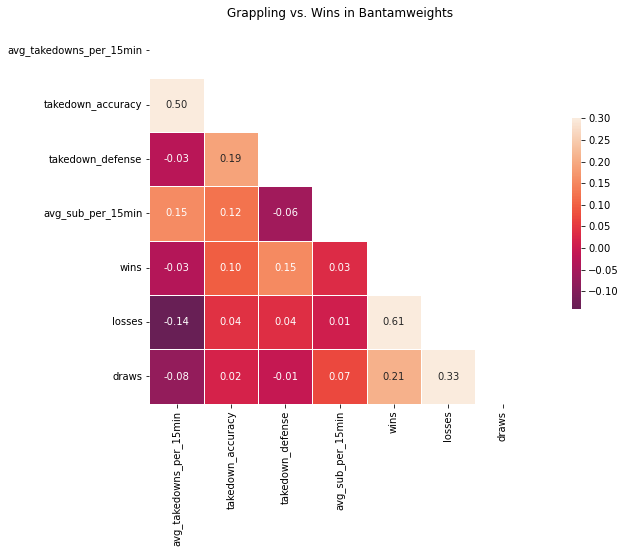

In [64]:
bw = df.query('weight_class=="Bantamweight"')[grappling_stats + record]

corr_matrix = bw[grappling_stats + record].corr()

plt.figure(figsize = (15,7))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap="rocket", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Grappling vs. Wins in Bantamweights')

plt.show()

In [ ]:
grappling = list(bw[grappling_stats].columns)
rec = list(bw[record].columns)
grappling_len = len(grappling)
rec_len = len(rec)
l = []
coefs = []
grappling_record_corr = {}
x=0

for i in range(grappling_len):
    for j in range(rec_len):
        grappling_rec = grappling[i]+' vs '+rec[j]
        l.append(grappling_rec)
        spearman_coef = spearmanr(bw[grappling[i]], bw[record[j]]).correlation
        coefs.append(spearman_coef)
        
for i in l:
    grappling_record_corr[l[x]] = coefs[x]
    x+=1
    
t = pd.DataFrame(grappling_record_corr.items(), columns=['stats', 'corr_coef'])
pd.set_option('display.max_colwidth', None)
t.sort_values(by='corr_coef', ascending=False)

No strong correlation detected between grappling stats and wins in Bantamweights.

### Featherweight <a class="anchor" id="Grappling_vs._Wins_Featherweight"></a>

In [ ]:
feathw = df.query('weight_class=="Featherweight"')[grappling_stats + record]

corr_matrix = feathw[grappling_stats + record].corr()

plt.figure(figsize = (15,7))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap="rocket", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Grappling vs. Wins in Featherweights')

plt.show()

In [ ]:
grappling = list(feathw[grappling_stats].columns)
rec = list(feathw[record].columns)
grappling_len = len(grappling)
rec_len = len(rec)
l = []
coefs = []
grappling_record_corr = {}
x=0

for i in range(grappling_len):
    for j in range(rec_len):
        grappling_rec = grappling[i]+' vs '+rec[j]
        l.append(grappling_rec)
        spearman_coef = spearmanr(feathw[grappling[i]], feathw[record[j]]).correlation
        coefs.append(spearman_coef)
        
for i in l:
    grappling_record_corr[l[x]] = coefs[x]
    x+=1
    
t = pd.DataFrame(grappling_record_corr.items(), columns=['stats', 'corr_coef'])
pd.set_option('display.max_colwidth', None)
t.sort_values(by='corr_coef', ascending=False)

There is positive correlation between an average of submissions per 15 minutes and number of wins in featherweights.

### Lightweight  <a class="anchor" id="Grappling_vs._Wins_Lightweight"></a>

In [ ]:
lw = df.query('weight_class=="Lightweight"')[grappling_stats + record]

corr_matrix = lw[grappling_stats + record].corr()

plt.figure(figsize = (15,7))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap="rocket", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Grappling vs. Wins in Lightweights')

plt.show()

In [ ]:
grappling = list(lw[grappling_stats].columns)
rec = list(lw[record].columns)
grappling_len = len(grappling)
rec_len = len(rec)
l = []
coefs = []
grappling_record_corr = {}
x=0

for i in range(grappling_len):
    for j in range(rec_len):
        grappling_rec = grappling[i]+' vs '+rec[j]
        l.append(grappling_rec)
        spearman_coef = spearmanr(lw[grappling[i]], lw[record[j]]).correlation
        coefs.append(spearman_coef)
        
for i in l:
    grappling_record_corr[l[x]] = coefs[x]
    x+=1
    
t = pd.DataFrame(grappling_record_corr.items(), columns=['stats', 'corr_coef'])
pd.set_option('display.max_colwidth', None)
t.sort_values(by='corr_coef', ascending=False)

No strong correlation detected between grappling stats and wins in Lightweights.

### Middleweight <a class="anchor" id="Grappling_vs._Wins_Middleweight"></a>

In [ ]:
mw = df.query('weight_class=="Middleweight"')[grappling_stats + record]

corr_matrix = mw[grappling_stats + record].corr()

plt.figure(figsize = (15,7))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap="rocket", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Grappling vs. Wins in Middleweights')

plt.show()

In [ ]:
grappling = list(mw[grappling_stats].columns)
rec = list(mw[record].columns)
grappling_len = len(grappling)
rec_len = len(rec)
l = []
coefs = []
grappling_record_corr = {}
x=0

for i in range(grappling_len):
    for j in range(rec_len):
        grappling_rec = grappling[i]+' vs '+rec[j]
        l.append(grappling_rec)
        spearman_coef = spearmanr(mw[grappling[i]], mw[record[j]]).correlation
        coefs.append(spearman_coef)
        
for i in l:
    grappling_record_corr[l[x]] = coefs[x]
    x+=1
    
t = pd.DataFrame(grappling_record_corr.items(), columns=['stats', 'corr_coef'])
pd.set_option('display.max_colwidth', None)
t.sort_values(by='corr_coef', ascending=False)

No strong correlation detected between grappling stats and wins in Middleweights.

### Light Heavyweight <a class="anchor" id="Grappling_vs._Wins_Light_Heavyweight"></a>

In [ ]:
lhw = df.query('weight_class=="Light Heavyweight"')[grappling_stats + record]

corr_matrix = lhw[grappling_stats + record].corr()

plt.figure(figsize = (15,7))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap="rocket", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Grappling vs. Wins in Light Heavyweights')

plt.show()

In [ ]:
grappling = list(lhw[grappling_stats].columns)
rec = list(lhw[record].columns)
grappling_len = len(grappling)
rec_len = len(rec)
l = []
coefs = []
grappling_record_corr = {}
x=0

for i in range(grappling_len):
    for j in range(rec_len):
        grappling_rec = grappling[i]+' vs '+rec[j]
        l.append(grappling_rec)
        spearman_coef = spearmanr(lhw[grappling[i]], lhw[record[j]]).correlation
        coefs.append(spearman_coef)
        
for i in l:
    grappling_record_corr[l[x]] = coefs[x]
    x+=1
    
t = pd.DataFrame(grappling_record_corr.items(), columns=['stats', 'corr_coef'])
pd.set_option('display.max_colwidth', None)
t.sort_values(by='corr_coef', ascending=False)

Strong positive correlation (coef>0.3) detected between an average amount of submission attempts and losses in light heavyweights.

### Heavyweights <a class="anchor" id="Grappling_vs._Wins_Heavyweight"></a>

In [ ]:
hw = df.query('weight_class=="Heavyweight"')[grappling_stats + record]

corr_matrix_hw = hw[grappling_stats + record].corr()

plt.figure(figsize = (15,7))

mask = np.triu(np.ones_like(corr_matrix_hw, dtype=bool))
sns.heatmap(corr_matrix_hw, annot=True, fmt='.2f', mask=mask, cmap="rocket", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Grappling vs. Wins in Heavyweights')

plt.show()

In [ ]:
grappling = list(hw[grappling_stats].columns)
rec = list(hw[record].columns)
grappling_len = len(grappling)
rec_len = len(rec)
l = []
coefs = []
grappling_record_corr = {}
x=0

for i in range(grappling_len):
    for j in range(rec_len):
        grappling_rec = grappling[i]+' vs '+rec[j]
        l.append(grappling_rec)
        spearman_coef = spearmanr(hw[grappling[i]], hw[record[j]]).correlation
        coefs.append(spearman_coef)
        
for i in l:
    grappling_record_corr[l[x]] = coefs[x]
    x+=1
    
t = pd.DataFrame(grappling_record_corr.items(), columns=['stats', 'corr_coef'])
pd.set_option('display.max_colwidth', None)
t.sort_values(by='corr_coef', ascending=False)

No strong correlation detected between grappling stats and wins in Heavyweights.

## Physical features and grappling <a class="anchor" id="Physical_features_and_grappling"></a>

In [ ]:
corr_matrix = df[grappling_stats + physical_features].corr()

plt.figure(figsize = (15,7))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap="rocket", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Grappling and Physical Features')

plt.show()

In [ ]:
grappling = list(df[grappling_stats].columns)
physical = list(df[physical_features].columns)
grappling_len = len(grappling)
physical_len = len(physical)
l = []
coefs = []
grappling_physical_corr = {}
x=0

for i in range(grappling_len):
    for j in range(physical_len):
        grappling_physical = grappling[i]+' vs '+physical[j]
        l.append(grappling_physical)
        spearman_coef = spearmanr(df[grappling[i]], df[physical[j]]).correlation
        coefs.append(spearman_coef)
        
for i in l:
    grappling_physical_corr[l[x]] = coefs[x]
    x+=1
    
t = pd.DataFrame(grappling_physical_corr.items(), columns=['stats', 'corr_coef'])
pd.set_option('display.max_colwidth', None)
t.sort_values(by='corr_coef', ascending=False)

There is no significant correlation detected between an athlete's physical features and grappling skills.

## Physical features and striking <a class="anchor" id="Physical_features_and_striking"></a>

In [ ]:
corr_matrix = df[striking_stats + physical_features].corr()

plt.figure(figsize = (15,7))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap="rocket", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Striking and Physical Features')

plt.show()

In [ ]:
striking = list(df[striking_stats].columns)
physical = list(df[physical_features].columns)
striking_len = len(striking)
physical_len = len(physical)
l = []
coefs = []
striking_physical_corr = {}
x=0

for i in range(striking_len):
    for j in range(physical_len):
        striking_physical = striking[i]+' vs '+physical[j]
        l.append(striking_physical)
        spearman_coef = spearmanr(df[striking[i]], df[physical[j]]).correlation
        coefs.append(spearman_coef)
        
for i in l:
    striking_physical_corr[l[x]] = coefs[x]
    x+=1
    
t = pd.DataFrame(striking_physical_corr.items(), columns=['stats', 'corr_coef'])
pd.set_option('display.max_colwidth', None)
t.sort_values(by='corr_coef', ascending=False)

There is no significant correlation detected between an athlete's physical features and striking skills either.

---

# Conclusions <a class="anchor" id="Conclusions"></a>

Having analyzed the dataset we can summarize everything we've identified:


- No particular stance type seems to be correlated with a bigger number of wins.  
- Striking skills have a strong positive correlation with the number of wins in Middleweights.  
- Strong negative correlation between significant strikes absorbed per minute and the number of wins exists in Light Heavyweights.  
- On average, Middleweights exhibit a better level of grappling with the only exception being takedown defence - the light heavyweights take the lead here since.  
- Featherweights exhibit positive correlation between an average submission attempts per 15 minutes and number of wins.
- Strong positive correlation identified in light heavyweights between an average of submission attempts per 15 minutes and the number of losses.

## What else could be done  <a class="anchor" id="What_else_could_be_done"></a>

 If we had data on athletes' gender, we could analyze differences in their winning strategies by gender. Unfortunately, this dataset doesn't present such an opportunity 